# Training a convnet from scratch on a small dataset
## Cats and dog example

Having to train an image-classification model using very little data is a common situation, which you’ll likely encounter in practice if you ever do computer vision in a professional context. A “few” samples can mean anywhere from a few hundred to a
few tens of thousands of images. As a practical example, we’ll focus on classifying images as dogs or cats, in a dataset containing 4,000 pictures of cats and dogs (2,000 cats, 2,000 dogs). We’ll use 2,000 pictures for training—1,000 for  validation, and 1,000 for testing

What constitutes lots of samples is relative—relative to the size and depth of the network you’re trying to train, for starters. It isn’t possible to train a convnet to solve a complex problem with just a few tens of samples, but a few hundred can potentially suffice if the model is small and well regularized and the task is simple. Because convnets learn local, ranslation-invariant features, they’re highly data efficient on perceptual problems. Training a convnet from scratch on a very small image dataset will still yield reasonable results despite a relative lack of data, without the need for any custom feature engineering. You’ll see this in action in this section.

What’s more, deep-learning models are by nature highly repurposable: you can take, say, an image-classification or speech-to-text model trained on a large-scale dataset and reuse it on a significantly different problem with only minor changes. Specifically, in the case of computer vision, many pretrained models (usually trained on the ImageNet dataset) are now publicly available for download and can be used to bootstrap powerful vision models out of very little data. That’s what you’ll do in the next section. Let’s start by getting your hands on the data. 

You can download the data from here: [www.kaggle.com/c/dogs-vs-cats/data](www.kaggle.com/c/dogs-vs-cats/data)

![examples form the data](img/03_cats_dogs_example.jpg)

# Creating the folders

In [1]:
import os
import shutil

In [2]:
# Path to the directory where the original dataset was uncompressed
original_dataset_dir = 'D:/cats_and_dogs_data/train'
# Directory where you’ll store your smaller dataset
base_dir = 'D:/cats_and_dogs_data/cats_and_dogs_small'
os.mkdir(base_dir)

In [3]:
train_dir = os.path.join(base_dir, 'train') #Directories for the training 
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation') #Directories for the validation 
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test') #Directories for the test
os.mkdir(test_dir)

In [4]:
train_cats_dir = os.path.join(train_dir, 'cats') # Directory with training cat pictures
os.mkdir(train_cats_dir)
train_dogs_dir = os.path.join(train_dir, 'dogs') # Directory with training dog pictures
os.mkdir(train_dogs_dir)
validation_cats_dir = os.path.join(validation_dir, 'cats') #Directory with validation cat pictures
os.mkdir(validation_cats_dir)

In [5]:
validation_dogs_dir = os.path.join(validation_dir, 'dogs') #Directory with validation dog pictures
os.mkdir(validation_dogs_dir)
test_cats_dir = os.path.join(test_dir, 'cats') #Directory with test cat pictures
os.mkdir(test_cats_dir)
test_dogs_dir = os.path.join(test_dir, 'dogs') #Directory with test dog pictures
os.mkdir(test_dogs_dir)

In [6]:
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)] #Copies the first 1,000 cat images to train_cats_dir
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)] #Copies the next 500 cat images to validation_cats_dir
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)] #Copies the next 500 cat images to test_cats_dir
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)

In [7]:
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)] #Copies the first 1,000 dog images to train_dogs_dir
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)] #Copies the next 500 dog images to validation_dogs_dir
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)] #Copies the next 500 dog images to validation_dogs_dir
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

if we look at the library structure that we have just created it looks like this:
* test
    * cats -- 500 pictures
    * dogs -- 500 pictures
* train
    * cats -- 1000 pictures
    * dogs -- 1000 pictures
* validation
    * cats -- 1000 pictures
    * dogs -- 1000 pictures

# Building the network

You built a small convnet for MNIST in the previous example, so you should be familiar with such convnets. You’ll reuse the same general structure: the convnet will be a stack of alternated Conv2D (with relu activation) and MaxPooling2D layers

In [8]:
from keras import layers
from keras import models

Using TensorFlow backend.


In [9]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu',input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))

model.add(layers.Dense(1, activation='sigmoid'))

In [10]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)      

In [11]:
from keras import optimizers

Configuring the model for training

In [12]:
model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

## Data preprocessing

As you know by now, data should be formatted into appropriately preprocessed floatingpoint tensors before being fed into the network. Currently, the data sits on a drive as JPEG files, so the steps for getting it into the network are roughly as follows:
1. Read the picture files.
2. Decode the JPEG content to RGB grids of pixels.
3. Convert these into floating-point tensors.
4. Rescale the pixel values (between 0 and 255) to the [0, 1] interval (as you know, neural networks prefer to deal with small input values).

It may seem a bit daunting, but fortunately Keras has utilities to take care of these steps automatically. Keras has a module with image-processing helper tools, located at keras.preprocessing.image. In particular, it contains the class ImageDataGenerator, which lets you quickly set up Python generators that can automatically turn image files on disk into batches of preprocessed tensors. This is what you’ll use here.

###  Using ImageDataGenerator to read images from directories

In [13]:
from keras.preprocessing.image import ImageDataGenerator

In [14]:
# Rescales all images by 1/255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [15]:
train_generator = train_datagen.flow_from_directory(train_dir, target_size=(150, 150), batch_size=20, class_mode='binary')

Found 2000 images belonging to 2 classes.


In [16]:
validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                        target_size=(150, 150),
                                                        batch_size=20,
                                                        class_mode='binary')

Found 1000 images belonging to 2 classes.


# Fit the model

Let’s fit the model to the data using the generator. You do so using the fit_generator method, the equivalent of fit for data generators like this one. 

Because the data is being generated endlessly, the Keras model needs to know how many samples to draw from the generator before declaring an epoch over. This is the role of the steps_per_epoch argument.

## Fitting the model using a batch generator

In [17]:
history = model.fit_generator(train_generator,
                              steps_per_epoch=100,
                              epochs=30,
                              validation_data=validation_generator,
                              validation_steps=50)

Epoch 1/30
100/100 [==============================] - 50s 498ms/step - loss: 0.6907 - acc: 0.5285 - val_loss: 0.6755 - val_acc: 0.5800
Epoch 2/30
100/100 [==============================] - 48s 485ms/step - loss: 0.6551 - acc: 0.6100 - val_loss: 0.6833 - val_acc: 0.6460
Epoch 3/30
100/100 [==============================] - 56s 560ms/step - loss: 0.6012 - acc: 0.6855 - val_loss: 0.6098 - val_acc: 0.6570
Epoch 4/30
100/100 [==============================] - 55s 546ms/step - loss: 0.5560 - acc: 0.7085 - val_loss: 0.6805 - val_acc: 0.6950
Epoch 5/30
100/100 [==============================] - 61s 611ms/step - loss: 0.5332 - acc: 0.7285 - val_loss: 0.6367 - val_acc: 0.6880
Epoch 6/30
100/100 [==============================] - 58s 577ms/step - loss: 0.5059 - acc: 0.7525 - val_loss: 0.5850 - val_acc: 0.7140
Epoch 7/30
100/100 [==============================] - 58s 578ms/step - loss: 0.4787 - acc: 0.7705 - val_loss: 0.5164 - val_acc: 0.6980
Epoch 8/30
100/100 [==============================] - 6

It’s good practice to always save your models after training.

In [18]:
model.save('cats_and_dogs_small_1.h5') #saving the model

In [19]:
# load and evaluate a saved model
from numpy import loadtxt
from keras.models import load_model

In [20]:
# load model
model = load_model('cats_and_dogs_small_1.h5')

## Displaying curves of loss and accuracy during training

Let’s plot the loss and accuracy of the model over the training and validation data during training

In [21]:
import matplotlib.pyplot as plt

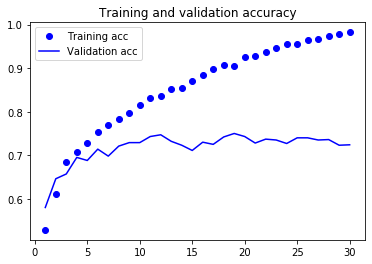

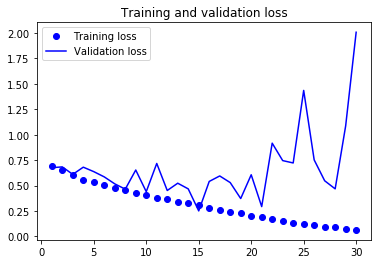

In [22]:
acc =  history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

These plots are characteristic of overfitting. The training accuracy increases linearly over time, until it reaches nearly 100%, whereas the validation accuracy stalls at 70–72%.

The validation loss reaches its minimum after only five epochs and then stalls, whereas the training loss keeps decreasing linearly until it reaches nearly 0.

Because you have relatively few training samples (2,000), overfitting will be your number-one concern. You already know about a number of techniques that can help mitigate overfitting, such as dropout and weight decay (L2 regularization). We’re now going to work with a new one, specific to computer vision and used almost universally when processing images with deep-learning models: data augmentation. 

## Using data augmentation

Data augmentation takes the approach of generating more training data from existing training samples, by augmenting the samples via a number of random transformations that yield believable-looking images. The goal is that at training time, your model will never see the exact same picture twice. This helps expose the model to more aspects of the data and generalize better.

In Keras, this can be done by configuring a number of random transformations to be performed on the images read by the ImageDataGenerator instance. Let’s get started with an example.

### Setting up a data augmentation configuration via ImageDataGenerator

In [23]:
datagen = ImageDataGenerator(rotation_range=45,
                             width_shift_range=0.2,
                             height_shift_range=0.2,
                             shear_range=0.2,
                             zoom_range=0.2,
                             horizontal_flip=True,
                             fill_mode='nearest')

These are just a few of the options available (for more, see the Keras documentation). Let’s quickly go over this code:

* rotation_range: is a value in degrees (0–180), a range within which to randomly rotate pictures.
* width_shift: and height_shift are ranges (as a fraction of total width or height) within which to randomly translate pictures vertically or horizontally.
* shear_range: is for randomly applying shearing transformations.
* zoom_range: is for randomly zooming inside pictures.
* horizontal_flip: is for randomly flipping half the images horizontally—relevant when there are no assumptions of horizontal asymmetry (for example, real-world pictures).
* fill_mode: is the strategy used for filling in newly created pixels, which can appear after a rotation or a width/height shift.

#### Let’s look at the augmented images

Displaying some randomly augmented training images

In [24]:
from keras.preprocessing import image #Module with imagepreprocessing utilities

In [25]:
fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]

In [26]:
img_path = fnames[3] #Chooses one image to augment

In [27]:
img = image.load_img(img_path, target_size=(150, 150)) # Reads the image and resizes it

In [28]:
x = image.img_to_array(img) #Converts it to a Numpy array with shape (150, 150, 3)

In [29]:
x = x.reshape((1,) + x.shape) #Reshapes it to (1, 150, 150, 3)

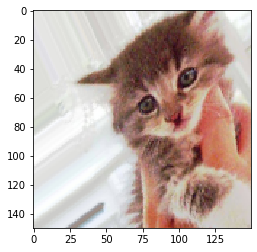

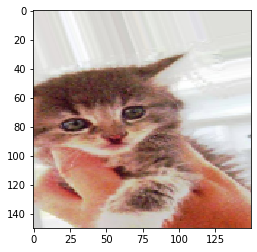

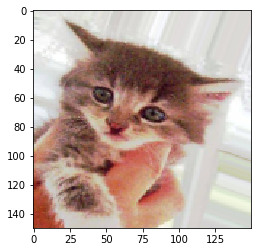

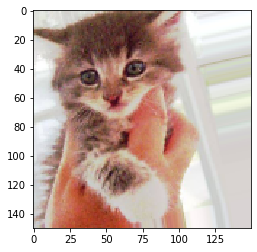

In [30]:
#Generates batches of randomly transformed images. Loops indefinitely, so you need to break the loop at some point!
i=0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
plt.show()

If you train a new network using this data-augmentation configuration, the network will never see the same input twice. But the inputs it sees are still heavily intercorrelated, because they come from a small number of original images—you can’t produce new information, you can only remix existing information. As such, this may not be enough to completely get rid of overfitting. To further fight overfitting, you’ll also add a Dropout layer to your model, right before the densely connected classifier.

## Defining a new convnet that includes dropout

In [31]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

In [32]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

In [33]:
test_datagen = ImageDataGenerator(rescale=1./255) #Note that the validation data shouldn’t be augmented!

In [34]:
train_generator = train_datagen.flow_from_directory(train_dir, # target directory
                                                    target_size=(150, 150), #Resizes all images to 150 × 150
                                                    batch_size=32, #32 set as deafult just too long training time
                                                    class_mode='binary')

Found 2000 images belonging to 2 classes.


In [35]:
validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                        target_size=(150, 150),
                                                        batch_size=32, #32 set as deafult just too long training time
                                                        class_mode='binary')

Found 1000 images belonging to 2 classes.


In [36]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100, #100 set as deafult just too long training time
    epochs=100, #100 set as deafult just too long training time
    validation_data=validation_generator,
    validation_steps=50)

Epoch 1/100
100/100 [==============================] - 103s 1s/step - loss: 0.6945 - acc: 0.5054 - val_loss: 0.6861 - val_acc: 0.5787
Epoch 2/100
100/100 [==============================] - 111s 1s/step - loss: 0.6786 - acc: 0.5716 - val_loss: 0.8048 - val_acc: 0.5219
Epoch 3/100
100/100 [==============================] - 107s 1s/step - loss: 0.6651 - acc: 0.5881 - val_loss: 0.6138 - val_acc: 0.6028
Epoch 4/100
100/100 [==============================] - 105s 1s/step - loss: 0.6492 - acc: 0.6128 - val_loss: 0.6316 - val_acc: 0.6591
Epoch 5/100
100/100 [==============================] - 105s 1s/step - loss: 0.6317 - acc: 0.6357 - val_loss: 0.6880 - val_acc: 0.6593
Epoch 6/100
100/100 [==============================] - 114s 1s/step - loss: 0.6128 - acc: 0.6613 - val_loss: 0.6823 - val_acc: 0.6508
Epoch 7/100
100/100 [==============================] - 113s 1s/step - loss: 0.6014 - acc: 0.6639 - val_loss: 0.5965 - val_acc: 0.7018
Epoch 8/100
100/100 [==============================] - 109s 1s

Epoch 62/100
100/100 [==============================] - 114s 1s/step - loss: 0.4100 - acc: 0.8131 - val_loss: 0.6666 - val_acc: 0.7798
Epoch 63/100
100/100 [==============================] - 106s 1s/step - loss: 0.4087 - acc: 0.8131 - val_loss: 0.3844 - val_acc: 0.7822
Epoch 64/100
100/100 [==============================] - 116s 1s/step - loss: 0.3985 - acc: 0.8188 - val_loss: 0.4089 - val_acc: 0.7848
Epoch 65/100
100/100 [==============================] - 104s 1s/step - loss: 0.4009 - acc: 0.8172 - val_loss: 0.2984 - val_acc: 0.8052
Epoch 66/100
100/100 [==============================] - 112s 1s/step - loss: 0.4119 - acc: 0.8097 - val_loss: 0.2710 - val_acc: 0.7732
Epoch 67/100
100/100 [==============================] - 117s 1s/step - loss: 0.3794 - acc: 0.8295 - val_loss: 0.5490 - val_acc: 0.7665
Epoch 68/100
100/100 [==============================] - 113s 1s/step - loss: 0.4018 - acc: 0.8153 - val_loss: 0.5346 - val_acc: 0.8099
Epoch 69/100
100/100 [==============================] -

In [37]:
model.save('cats_and_dogs_small_2.h5')

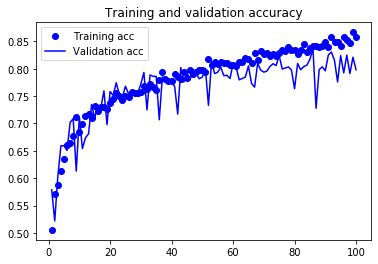

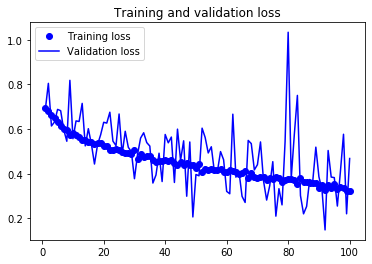

In [38]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

Thanks to data augmentation and dropout, you’re no longer overfitting: the training curves are closely tracking the validation curves. You now reach an accuracy of 82%, a 15% relative improvement over the non-regularized model.

As a next step to improve your accuracy on this problem, you’ll have to use a pretrained model, which is the focus of the next two sections. 

# Using a pretrained convnet

A common and highly effective approach to deep learning on small image datasets is to use a pretrained network. A pretrained network is a saved network that was previously trained on a large dataset, typically on a large-scale image-classification task. If this original dataset is large enough and general enough, then the spatial hierarchy of features learned by the pretrained network can effectively act as a generic model of the visual world, and hence its features can prove useful for many different computervision problems, even though these new problems may involve completely different classes than those of the original task. For instance, you might train a network on ImageNet (where classes are mostly animals and everyday objects) and then repurpose this trained network for something as remote as identifying furniture items in images. Such portability of learned features across different problems is a key advantage of deep learning compared to many older, shallow-learning  approaches, and it makes deep learning very effective for small-data problems.

You’ll use the VGG16 architecture, developed by Karen Simonyan and Andrew Zisserman in 2014; it’s a simple and widely used convnet architecture for ImageNet.

## Feature extraction

Feature extraction consists of using the representations learned by a previous network to extract interesting features from new samples. These features are then run through a new classifier, which is trained from scratch.

![swapping_class](img/03_swapping_classifiers.jpg)

## Instantiating the VGG16 convolutional base

In [39]:
from keras.applications import VGG16

In [40]:
conv_base = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

58892288/58889256 [==============================] - 26s 0us/step


You pass three arguments to the constructor:
* weights specifies the weight checkpoint from which to initialize the model. 
* include_top refers to including (or not) the densely connected classifier on top of the network. By default, this densely connected classifier corresponds to the 1,000 classes from ImageNet. Because you intend to use your own densely connected classifier (with only two classes: cat and dog), you don’t need to include it.
* input_shape is the shape of the image tensors that you’ll feed to the network. This argument is purely optional: if you don’t pass it, the network will be able to process inputs of any size.

In [41]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

The final feature map has shape (4, 4, 512). That’s the feature on top of which you’ll stick a densely connected classifier.

At this point, there are two ways you could proceed:
* Running the convolutional base over your dataset, recording its output to a Numpy array on disk, and then using this data as input to a standalone, densely connected classifier similar to those you saw in part 1 of this book. This solution is fast and cheap to run, because it only requires running the convolutional base once for every input image, and the convolutional base is by far the most expensive part of the pipeline. But for the same reason, this technique won’t allow you to use data augmentation.
* Extending the model you have (conv_base) by adding Dense layers on top, and running the whole thing end to end on the input data. This will allow you to use data augmentation, because every input image goes through the convolutional base every time it’s seen by the model. But for the same reason, this technique is far more expensive than the first.

We’ll cover both techniques. Let’s walk through the code required to set up the first one: recording the output of conv_base on your data and using these outputs as inputs to a new model.

## Extracting features using the pretrained convolutional base

In [42]:
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

In [43]:
datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20

In [44]:
def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 4, 4, 512))
    labels = np.zeros(shape=(sample_count))
    generator = datagen.flow_from_directory(directory, target_size=(150, 150), batch_size=batch_size, class_mode='binary')
    i=0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            break
    return features, labels

In [45]:
train_features, train_labels = extract_features(train_dir, 2000)
validation_features, validation_labels = extract_features(validation_dir, 1000)
test_features, test_labels = extract_features(test_dir, 1000)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [46]:
train_features = np.reshape(train_features, (2000, 4*4* 512))
validation_features = np.reshape(validation_features, (1000, 4*4* 512))
test_features = np.reshape(test_features, (1000, 4*4* 512))

In [47]:
from keras import models
from keras import layers
from keras import optimizers

In [48]:
model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim=4 * 4 * 512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer=optimizers.RMSprop(lr=2e-5), loss='binary_crossentropy', metrics=['acc'])
history = model.fit(train_features, train_labels, epochs=30, batch_size=20,
validation_data=(validation_features, validation_labels))

Train on 2000 samples, validate on 1000 samples
Epoch 1/30
2000/2000 [==============================] - 3s 2ms/step - loss: 0.5935 - acc: 0.6745 - val_loss: 0.4529 - val_acc: 0.8170
Epoch 2/30
2000/2000 [==============================] - 3s 2ms/step - loss: 0.4230 - acc: 0.8070 - val_loss: 0.3607 - val_acc: 0.8610
Epoch 3/30
2000/2000 [==============================] - 3s 2ms/step - loss: 0.3596 - acc: 0.8480 - val_loss: 0.3266 - val_acc: 0.8680
Epoch 4/30
2000/2000 [==============================] - 3s 2ms/step - loss: 0.3213 - acc: 0.8615 - val_loss: 0.3027 - val_acc: 0.8790
Epoch 5/30
2000/2000 [==============================] - 3s 2ms/step - loss: 0.2866 - acc: 0.8850 - val_loss: 0.2881 - val_acc: 0.8830
Epoch 6/30
2000/2000 [==============================] - 3s 2ms/step - loss: 0.2650 - acc: 0.8935 - val_loss: 0.2739 - val_acc: 0.8930
Epoch 7/30
2000/2000 [==============================] - 3s 2ms/step - loss: 0.2447 - acc: 0.9100 - val_loss: 0.2715 - val_acc: 0.8960
Epoch 8/30
200

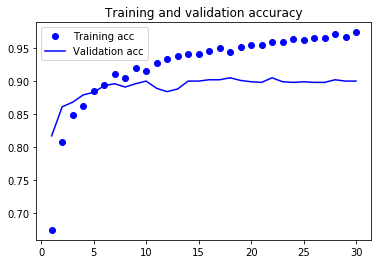

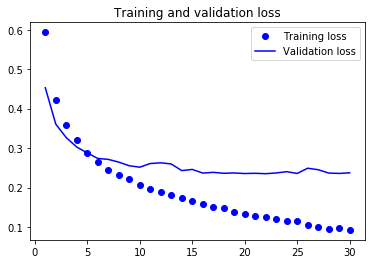

In [50]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

You reach a validation accuracy of about 90%—much better than you achieved in the previous section with the small model trained from scratch. But the plots also indicate that you’re overfitting almost from the start—despite using dropout with a fairly large rate. That’s because this technique doesn’t use data augmentation, which is essential for preventing overfitting with small image datasets. 

## FEATURE EXTRACTION WITH DATA AUGMENTATION

Now, let’s review the second technique I mentioned for doing feature extraction, which is much slower and more expensive, but which allows you to use data augmentation during training: extending the conv_base model and running it end to end on the inputs.

### Adding a densely connected classifier on top of the convolutional base

In [51]:
from keras import models
from keras import layers

In [52]:
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [53]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_3 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


As you can see, the convolutional base of VGG16 has 14,714,688 parameters, which is very large. The classifier you’re adding on top has 2 million parameters. Before you compile and train the model, it’s very important to freeze the convolutional base. Freezing a layer or set of layers means preventing their weights from being updated during training. If you don’t do this, then the representations that were previously learned by the convolutional base will be modified during training. 

Because the Dense layers on top are randomly initialized, very large weight updates would be propagated through the network, effectively destroying the representations previously learned.

In Keras, you freeze a network by setting its trainable attribute to False

In [57]:
print('This is the number of trainable weights before freezing the conv base:', len(model.trainable_weights))

This is the number of trainable weights before freezing the conv base: 30


In [58]:
conv_base.trainable = False

In [59]:
print('This is the number of trainable weights before freezing the conv base:', len(model.trainable_weights))

This is the number of trainable weights before freezing the conv base: 4


With this setup, only the weights from the two Dense layers that you added will be trained

### Training the model end to end with a frozen convolutional base

In [60]:
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers

In [61]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

In [62]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [63]:
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150, 150),
                                                    batch_size=20,
                                                    class_mode='binary')

Found 2000 images belonging to 2 classes.


In [64]:
validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                        target_size=(150, 150),
                                                        batch_size=20,
                                                        class_mode='binary')

Found 1000 images belonging to 2 classes.


In [65]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['acc'])

In [66]:
history = model.fit_generator(train_generator,
                              steps_per_epoch=100,
                              epochs=30,
                              validation_data=validation_generator,
                              validation_steps=50)

Epoch 1/30
100/100 [==============================] - 227s 2s/step - loss: 0.5904 - acc: 0.6925 - val_loss: 0.3991 - val_acc: 0.8110
Epoch 2/30
100/100 [==============================] - 267s 3s/step - loss: 0.4618 - acc: 0.8000 - val_loss: 0.2439 - val_acc: 0.8600
Epoch 3/30
100/100 [==============================] - 273s 3s/step - loss: 0.4275 - acc: 0.8170 - val_loss: 0.4924 - val_acc: 0.8700
Epoch 4/30
100/100 [==============================] - 276s 3s/step - loss: 0.3980 - acc: 0.8340 - val_loss: 0.3454 - val_acc: 0.8740
Epoch 5/30
100/100 [==============================] - 285s 3s/step - loss: 0.3671 - acc: 0.8380 - val_loss: 0.2514 - val_acc: 0.8800
Epoch 6/30
100/100 [==============================] - 271s 3s/step - loss: 0.3608 - acc: 0.8440 - val_loss: 0.1871 - val_acc: 0.8780
Epoch 7/30
100/100 [==============================] - 292s 3s/step - loss: 0.3524 - acc: 0.8495 - val_loss: 0.1813 - val_acc: 0.8800
Epoch 8/30
100/100 [==============================] - 268s 3s/step - 

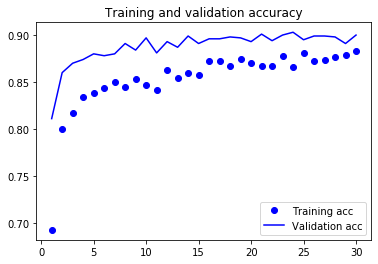

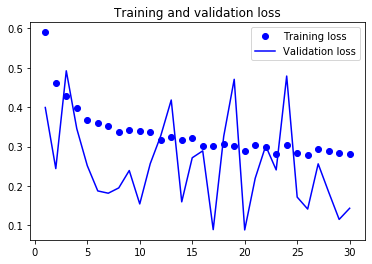

In [68]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

As you can see, you reach a validation accuracy of about 96%. This is much better than you achieved with the small convnet trained from scratch.

###  Fine-tuning

Another widely used technique for model reuse, complementary to feature extraction, is fine-tuning (see figure 5.19). Fine-tuning consists of unfreezing a few of the top layers of a frozen model base used for feature extraction, and jointly training
both the newly added part of the model (in this case, the fully connected classifier) and these top layers. This is called fine-tuning because it slightly adjusts the more abstract representations of the model being reused, in order to make them more relevant for the problem at hand.

it’s only possible to fine-tune the top layers of the convolutional base once the classifier on top has already been trained. If the classifier isn’t already trained, then the error signal propagating through the network during training will be too large, and the representations previously learned by the layers being fine-tuned will be destroyed. Thus the steps for fine-tuning a network are as follow:
1. Add your custom network on top of an already-trained base network.
2. Freeze the base network.
3. Train the part you added.
4. Unfreeze some layers in the base network.
5. Jointly train both these layers and the part you added.

You already completed the first three steps when doing feature extraction. Let’s proceed with step 4: you’ll unfreeze your conv_base and then freeze individual layers inside it.

Freezing all layers up to a specific one

In [69]:
conv_base.trainable = True

set_trainable = False

for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [70]:
model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-5), metrics=['acc'])

In [71]:
# takes forever to run
history = model.fit_generator(train_generator,
                              steps_per_epoch=100,
                              epochs=100,
                              validation_data=validation_generator,
                              validation_steps=50)

Epoch 1/100
  8/100 [=>............................] - ETA: 2:24 - loss: 0.3693 - acc: 0.8438

KeyboardInterrupt: 

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

You’re seeing a nice 1% absolute improvement in accuracy, from about 96% to above 97%.

You can now finally evaluate this model on the test data:

In [ ]:
test_generator = test_datagen.flow_from_directory(test_dir, target_size=(150, 150), batch_size=20, class_mode='binary')

In [ ]:
test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)
print('test acc:', test_acc)

Here you get a test accuracy of 97%. In the original Kaggle competition around this dataset, this would have been one of the top results. But using modern deep-learning techniques, you managed to reach this result using only a small fraction of the training data available (about 10%). There is a huge difference between being able to train on 20,000 samples compared to 2,000 samples!

### Wrapping up this part

Here’s what you should take away from the exercises in the past two sections:
* Convnets are the best type of machine-learning models for computer-vision tasks. It’s possible to train one from scratch even on a very small dataset, with decent results.
* On a small dataset, overfitting will be the main issue. Data augmentation is a powerful way to fight overfitting when you’re working with image data.
* It’s easy to reuse an existing convnet on a new dataset via feature extraction. This is a valuable technique for working with small image datasets.
* As a complement to feature extraction, you can use fine-tuning, which adapts to a new problem some of the representations previously learned by an existing model. This pushes performance a bit further.